## 0. Poisson neurons

### 0.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from tqdm import tqdm

In [15]:
alpha = 2
beta=0.5
N=100
delta_t=0.1
tau=10
T=1000
R=1
r_0=1
I_0=2
omega=1

In [16]:
def g(h, alpha=alpha, beta=beta):
    '''This function calculates the value of g(h) given the values of h, alpha, and beta. The function is defined as g(h) = alpha * h + beta.
    
    Parameters:
    h (np.ndarray): array of values of h for which the image is to be calculated.
    alpha (float): The value of alpha used in the transfer function.
    beta (float): The value of beta used in the transfer function.'''

    return 1/(1 + np.exp(-2 * alpha * (h - beta)))

# Define the interval for h
h = np.linspace(-10, 10, 100)

# Define the initial values of alpha and beta
alpha_initial = 1.0
beta_initial = 0.0

# Create the interactive plot
@interact(alpha=(0.0, 2.0, 0.1), beta=(-1.0, 1.0, 0.1))
def plot_g(alpha=alpha_initial, beta=beta_initial):
    # Calculate the values of g(h) using the updated alpha and beta
    g_values = g(h, alpha, beta)
    
    # Plot the function g(h)
    plt.plot(h, g_values)
    plt.xlabel('h')
    plt.ylabel('g(h)')
    plt.title('Plot of g(h)')
    plt.grid(True)
    plt.show()


interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0), FloatSlider(value=0.0, description…

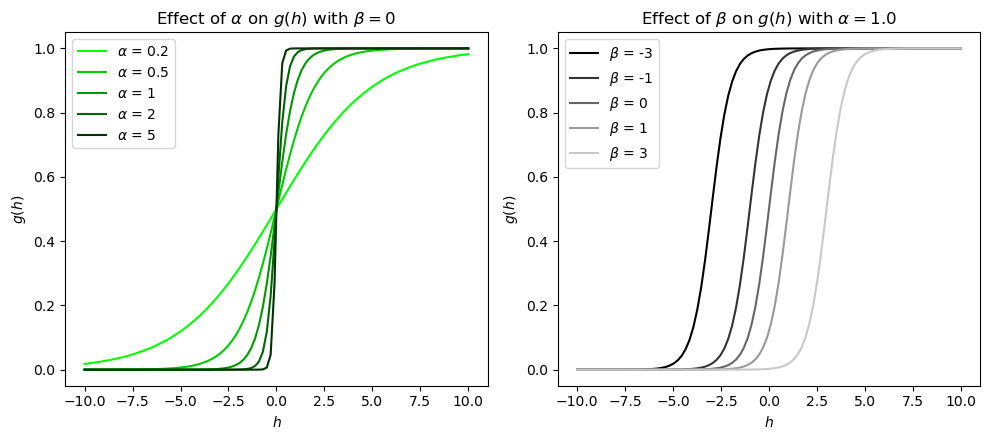

In [17]:
# Define the values for alpha and beta
alphas = [1/5, 1/2, 1, 2, 5]
alpha_colors = ['#00FF00', '#00CC00', '#009900', '#006600', '#003300']
betas  = [-3, -1, 0, 1, 3]
beta_colors = ['#000000', '#333333', '#666666', '#999999', '#C8C8C8']

# Create the figure and subplots
fig, (ax_alpha, ax_beta) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# Plot the curves with different colors and add legend
for i in range(len(alphas)):
    ax_alpha.plot(h, g(h, alphas[i], 0), color=alpha_colors[i], label = r'$\alpha$' + f' = {alphas[i]}')
    ax_beta.plot(h, g(h, 1.0, betas[i]), color=beta_colors[i], label = r'$\beta$' + f' = {betas[i]}')

# Set the title and labels for alpha
ax_alpha.set_title(r'Effect of $\alpha$ on $g(h)$ with $\beta = 0$')
ax_alpha.set_xlabel(r'$h$')
ax_alpha.set_ylabel(r'$g(h)$')
ax_alpha.legend()

# Set the title and labels for beta
ax_beta.set_title(r'Effect of $\beta$ on $g(h)$ with $\alpha = 1.0$')
ax_beta.set_xlabel(r'$h$')
ax_beta.set_ylabel(r'$g(h)$')
ax_beta.legend()

# Show the plot
plt.tight_layout()
plt.savefig('0_1.png', dpi=600)
plt.show()

### 0.2

In [19]:
def spike_simulation(N=N, delta_t=delta_t, tau=tau, T=T, R=R, r_0=r_0, I_0=I_0, omega=omega):
    """
    Simulates spike generation in a population of neurons.

    Parameters:
    - N (int): Number of neurons in the population.
    - delta_t (float): Time step size for simulation.
    - tau (float): Membrane time constant.
    - T (float): Total simulation time.
    - R (float): Resistance of the neuron.
    - r_0 (float): Baseline firing rate of the neuron.
    - I_0 (float): Amplitude of the input current.
    - omega (float): Frequency of the input current.

    Returns:
    - mean_spikes (ndarray): mean spike occurence over 1 ms bins.
    """

    h = np.zeros((int(T/delta_t), N)) # e.g. (10000, 100)
    r = np.zeros((int(T/delta_t), N))
    p = np.zeros((int(T/delta_t), N))
    print('Potential shape:', h.shape)

    r[0, :] = r_0 * g(h[0, :])

    for k in tqdm(range(h.shape[0]-1)):
        for n in range(h.shape[1]):
            h[k+1, n] = h[k, n] + delta_t/tau * (-h[k, n] + R * I_0 * np.sin(omega * k * delta_t))
            r[k+1, n] = r_0 * g(h[k+1, n])
            p[k+1, n] = r[k+1, n] * delta_t

    spikes = np.random.binomial(1, p).reshape((T, int(N/delta_t))) # e.g. (1000, 1000)
    mean_spikes = np.mean(spikes, axis=1) 

    return mean_spikes

In [5]:
spikes_100 = spike_simulation()

Potential shape: (10000, 100)


100%|██████████| 9999/9999 [00:02<00:00, 4439.62it/s]


(1000,)


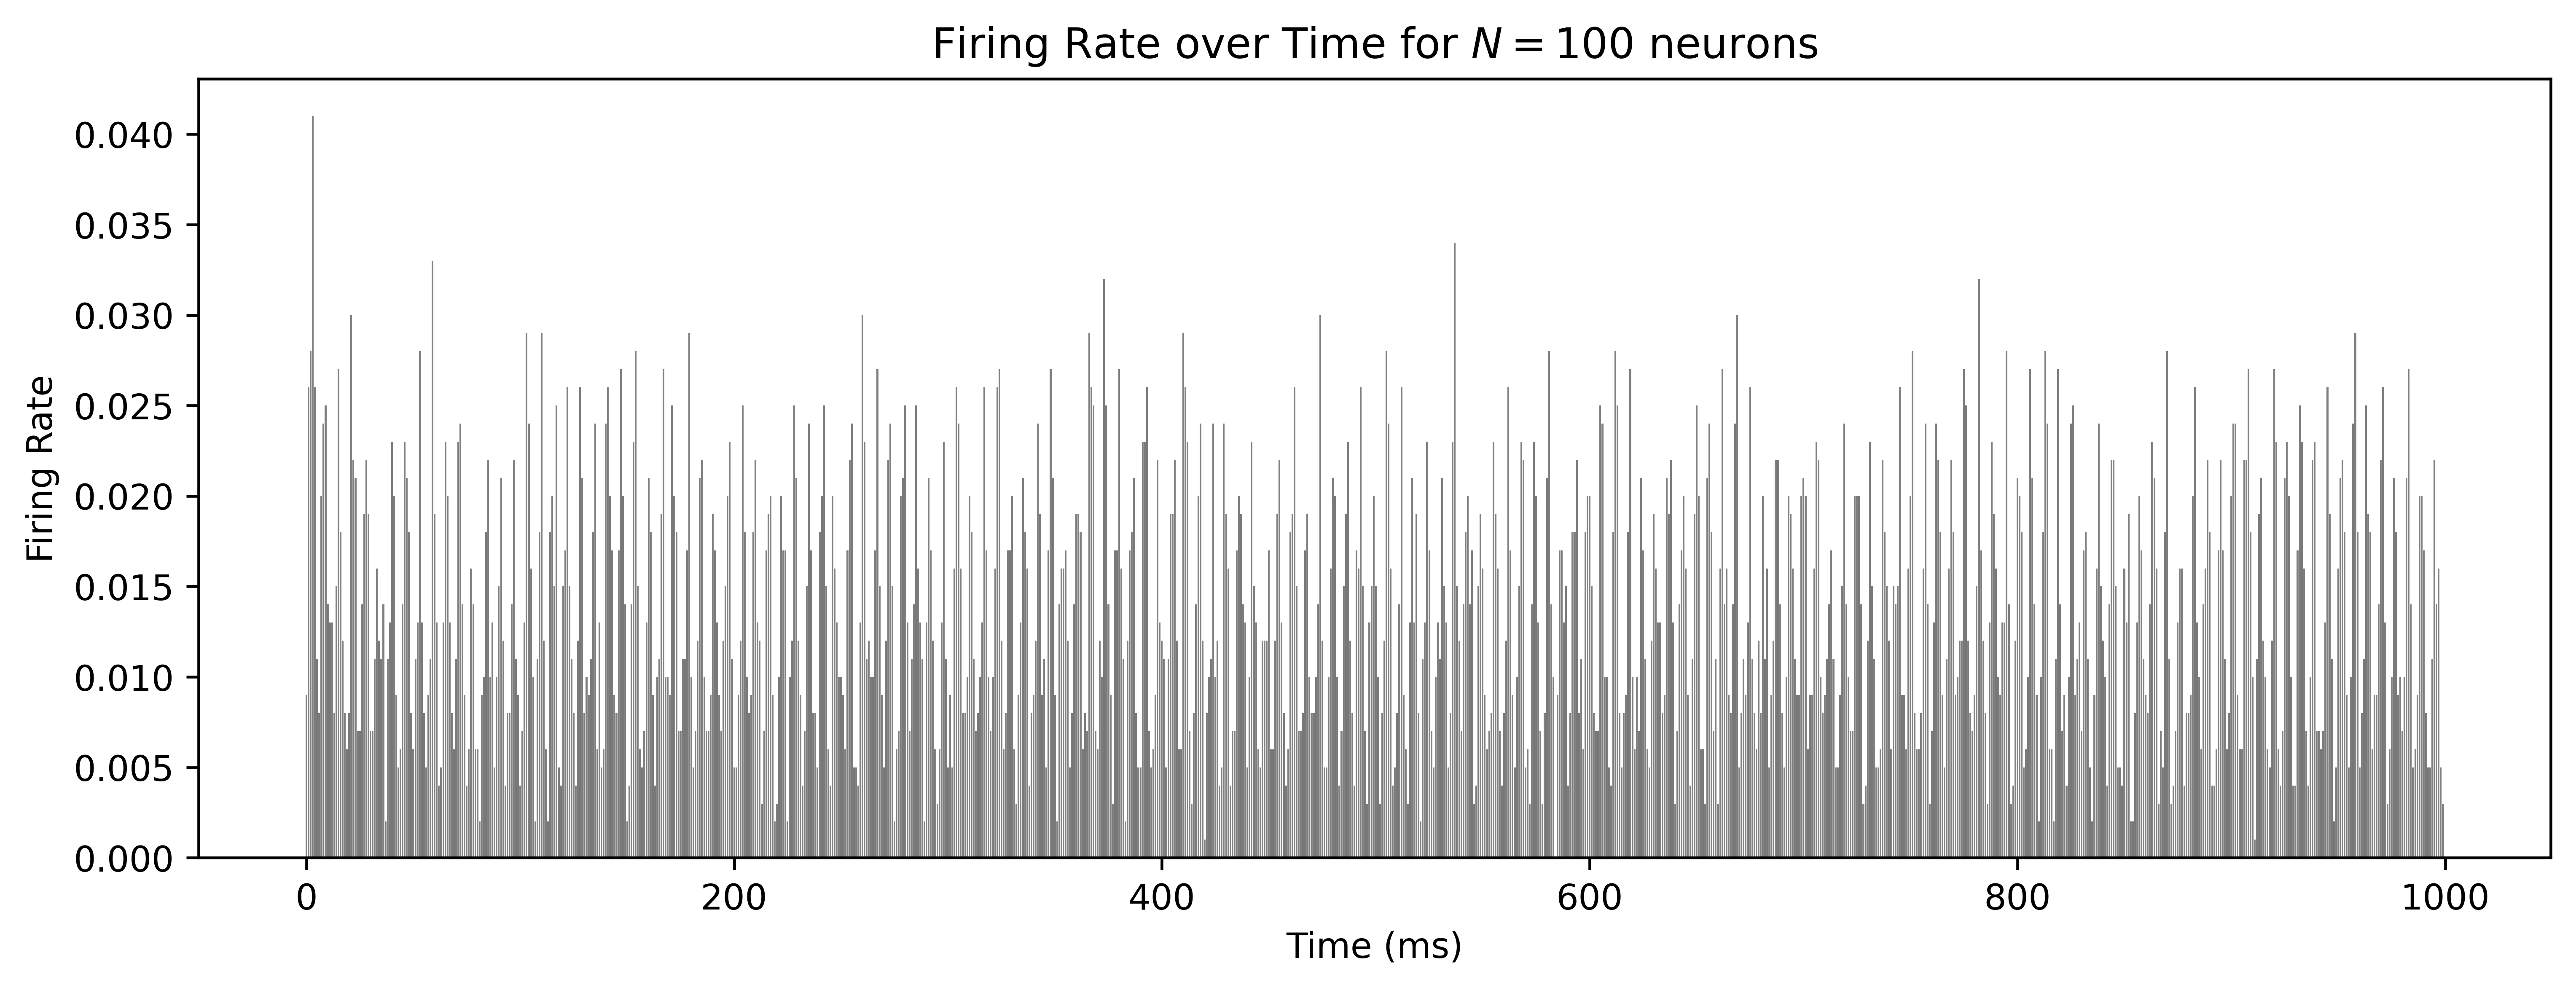

In [9]:
print(spikes_100.shape)
# Plot firing vs time

plt.figure(figsize=(12, 4), dpi=600)
plt.bar(np.arange(len(spikes_100)), spikes_100, color='gray')
plt.xlabel('Time (ms)')
plt.ylabel('Firing Rate')
plt.title(r'Firing Rate over Time for $N=100$ neurons')
plt.show()

In [11]:
spikes_1000 = spike_simulation(N=1000)

Potential shape: (10000, 1000)


100%|██████████| 9999/9999 [00:22<00:00, 444.77it/s]


(1000,)


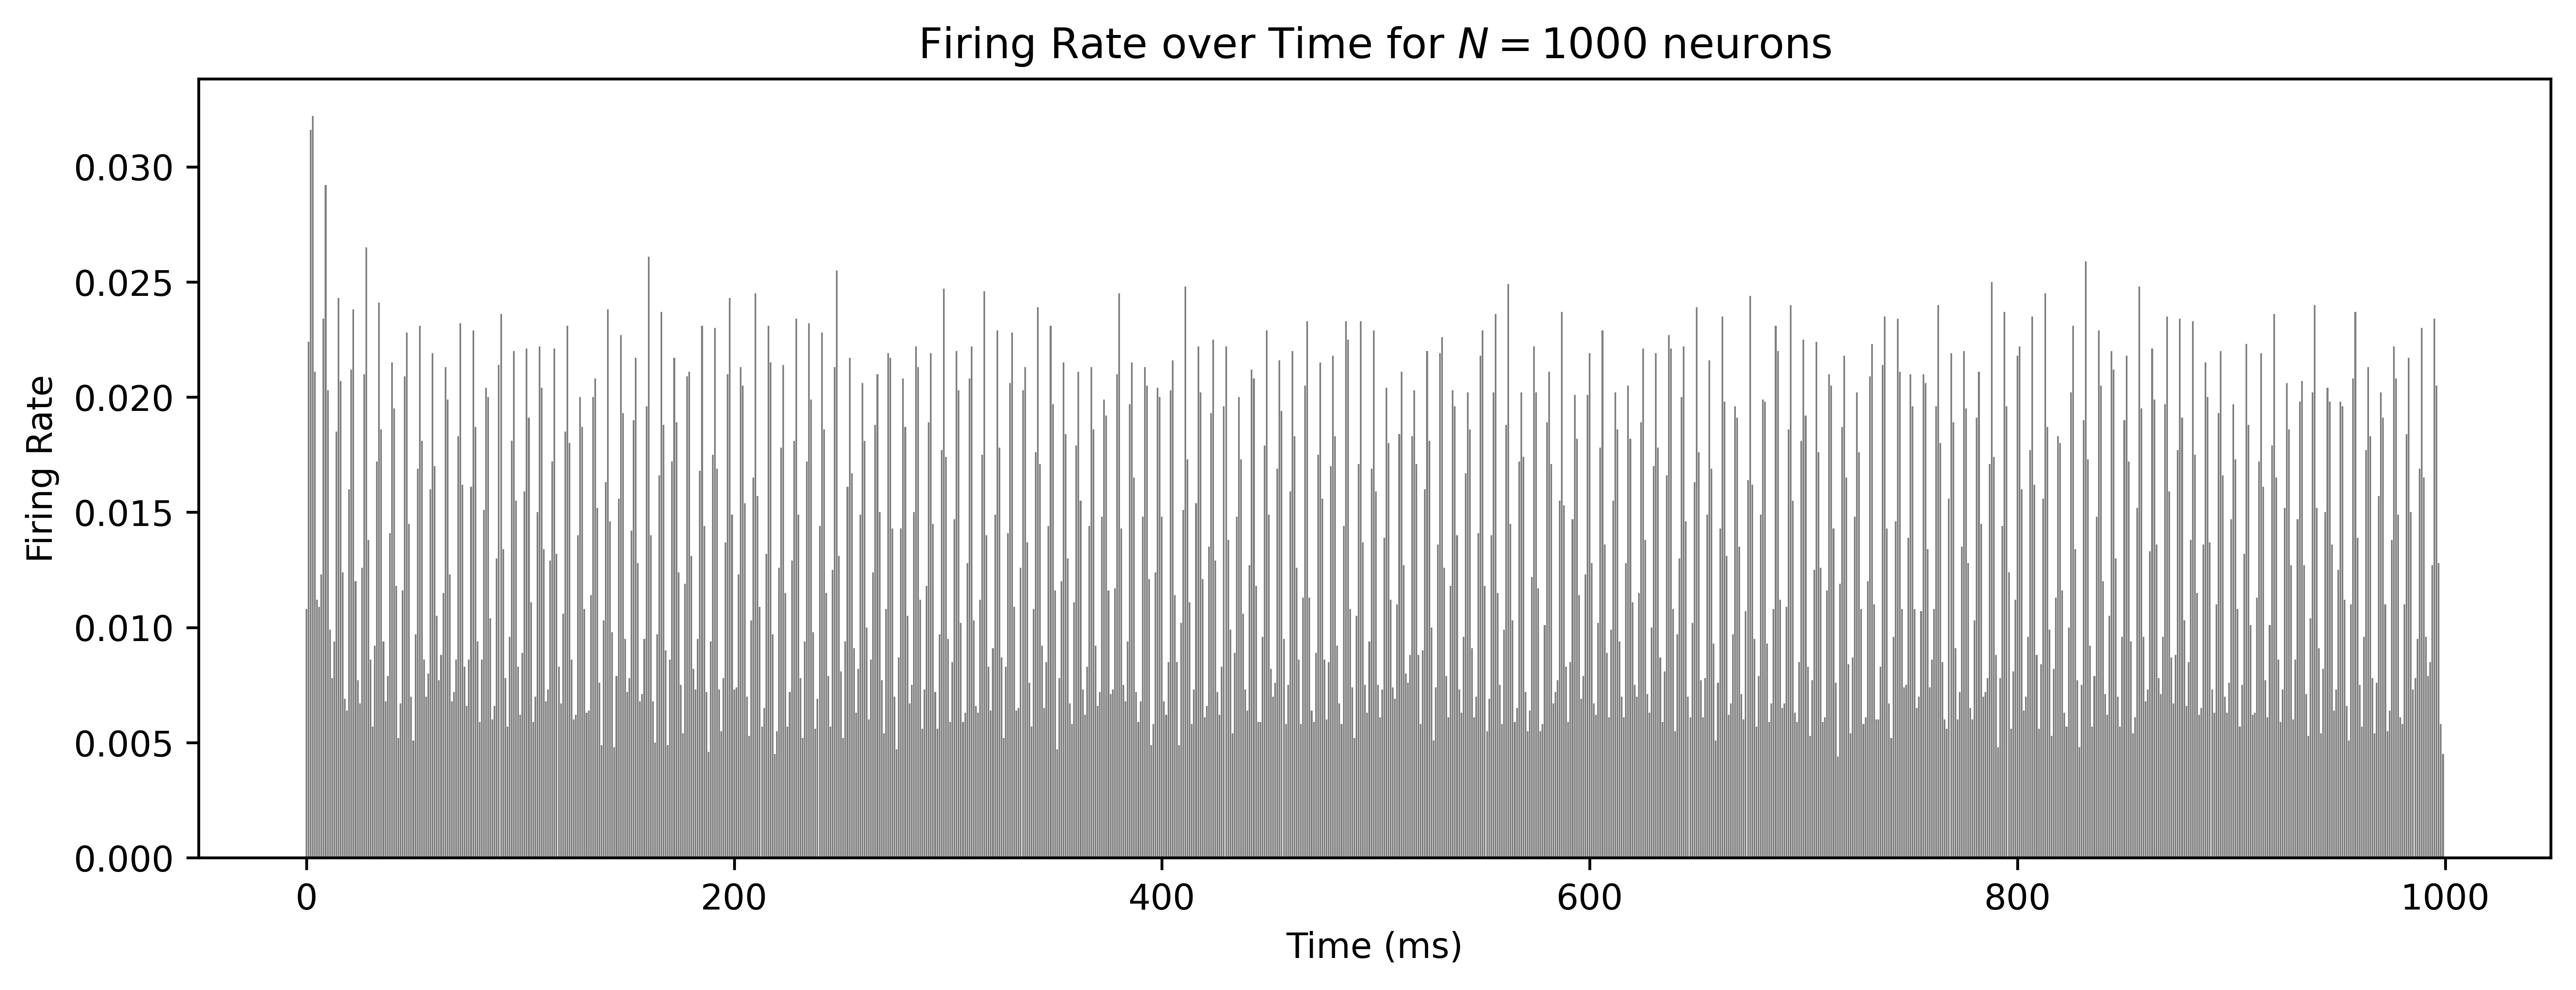

In [13]:
print(spikes_1000.shape)
# Plot firing vs time

plt.figure(figsize=(12, 4), dpi=600)
plt.bar(np.arange(len(spikes_1000)), spikes_1000, color='gray')
plt.xlabel('Time (ms)')
plt.ylabel('Firing Rate')
plt.title(r'Firing Rate over Time for $N=1000$ neurons')
plt.show()

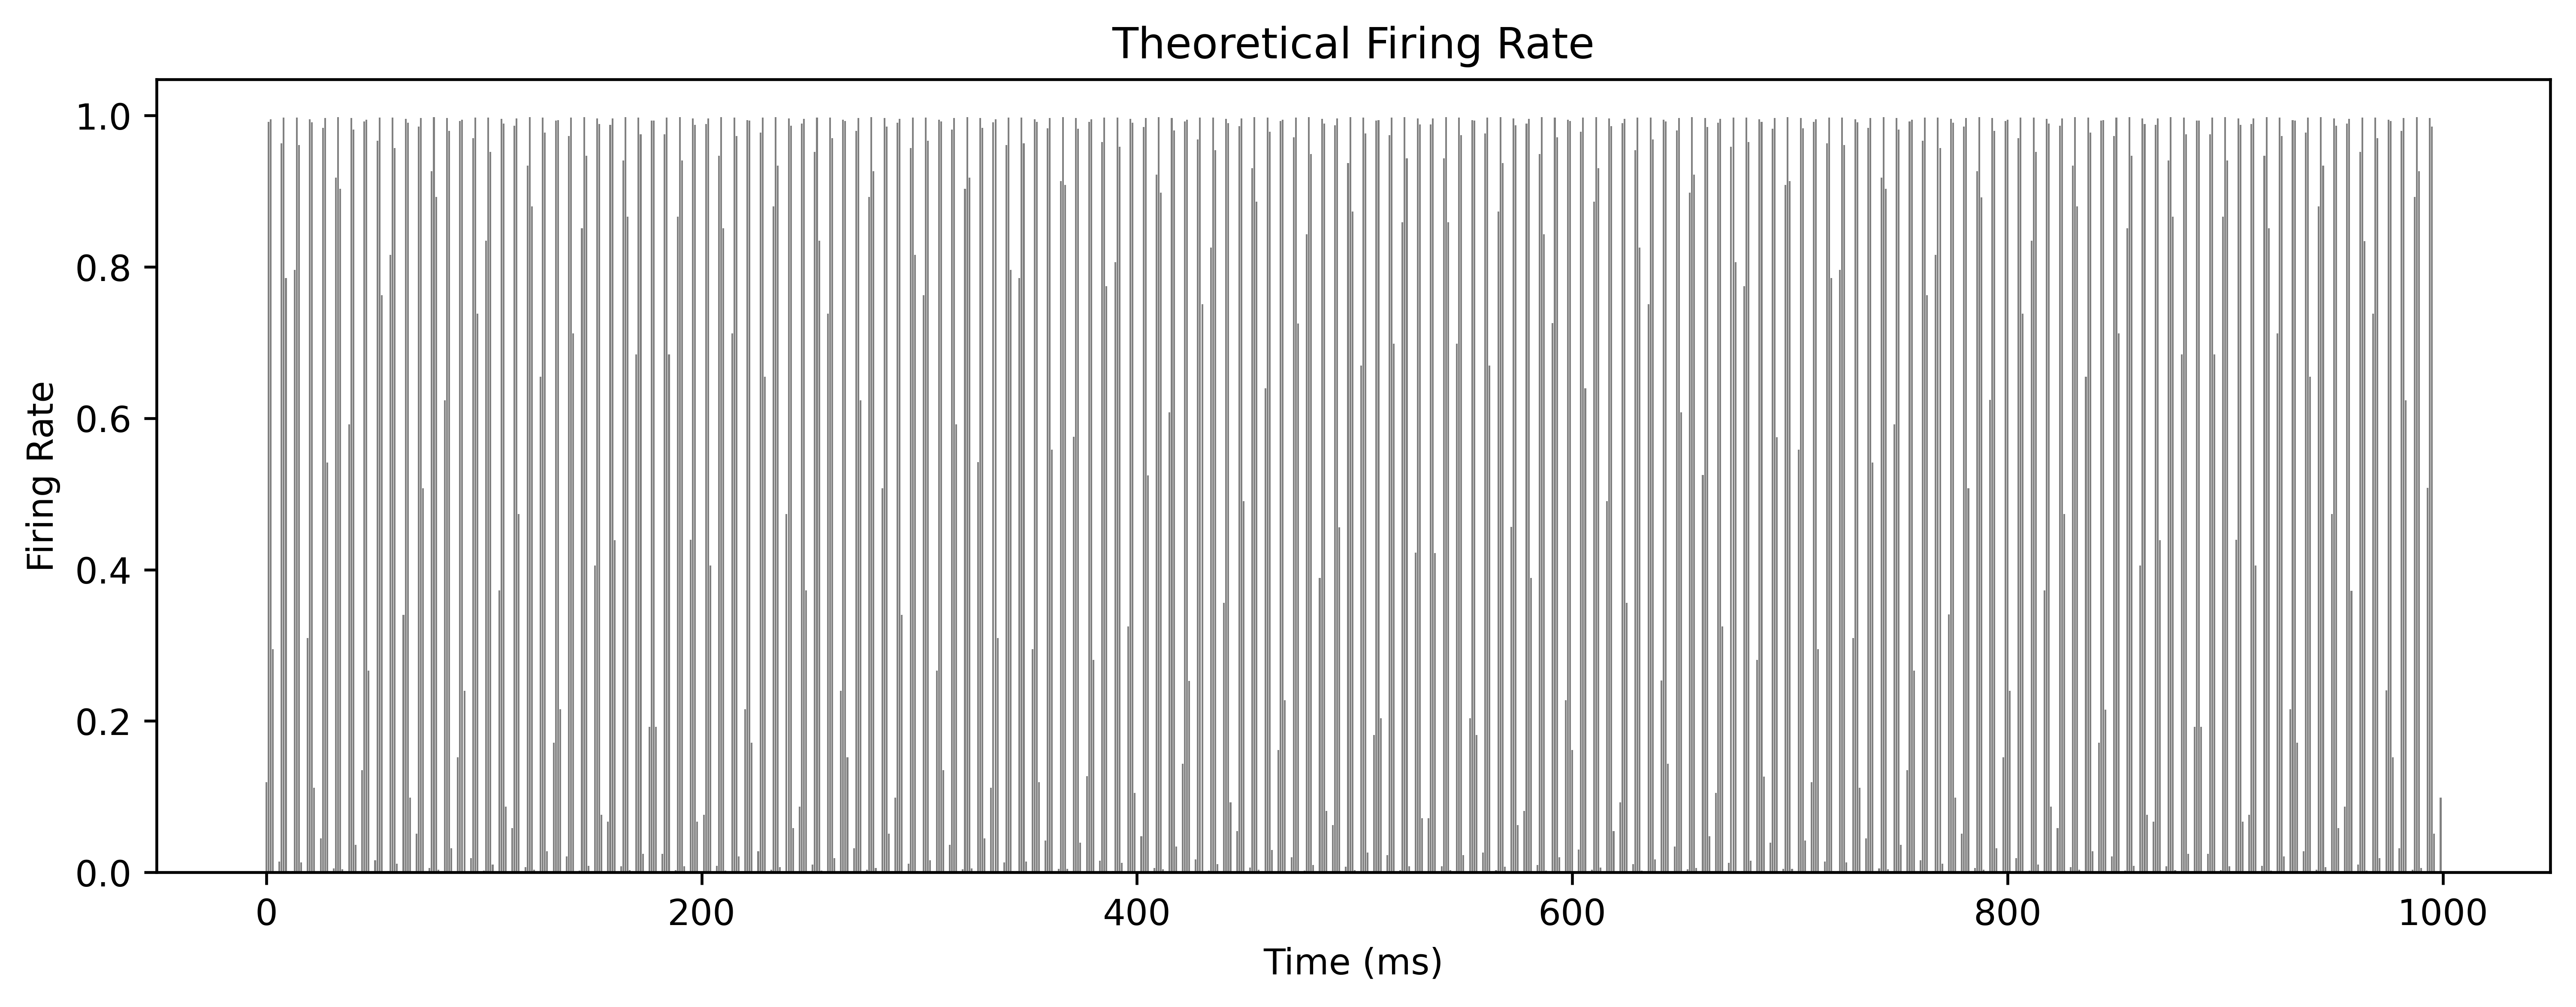

In [20]:
t = np.arange(T)
theoretical_firing_rate = r_0 * g(I_0 * np.sin(omega * t))

plt.figure(figsize=(12, 4), dpi=600)
plt.bar(t, theoretical_firing_rate, color='gray')
plt.xlabel('Time (ms)')
plt.ylabel('Firing Rate')
plt.title(r'Theoretical Firing Rate')
plt.show()